# ELECTION DATA

## Attribute Information:

- TimeElapsed (Numeric): Time (minutes) passed since the first data acquisition
- time (timestamp): Date and time of the data acquisition
- territoryName (string): Short name of the location (district or nation-wide)
- totalMandates (numeric): MP's elected at the moment
- availableMandates (numeric): MP's left to elect at the moment
- numParishes (numeric): Total number of parishes in this location
- numParishesApproved (numeric): Number of parishes approved in this location
- blankVotes (numeric): Number of blank votes
- blankVotesPercentage (numeric): Percentage of blank votes
- nullVotes (numeric): Number of null votes
- nullVotesPercentage (numeric): Percentage of null votes
- votersPercentage (numeric): Percentage of voters
- subscribedVoters (numeric): Number of subscribed voters in the location
- totalVoters (numeric): Percentage of blank votes
- pre.blankVotes (numeric): Number of blank votes (previous election)
- pre.blankVotesPercentage (numeric): Percentage of blank votes (previous election)
- pre.nullVotes (numeric): Number of null votes (previous election)
- pre.nullVotesPercentage (numeric): Percentage of null votes (previous election)
- pre.votersPercentage (numeric): Percentage of voters (previous election)
- pre.subscribedVoters (numeric): Number of subscribed voters in the location (previous election)
- pre.totalVoters (numeric): Percentage of blank votes (previous election)
- Party (string): Political Party
- Mandates (numeric): MP's elected at the moment for the party in a given district
- Percentage (numeric): Percentage of votes in a party
- validVotesPercentage (numeric): Percentage of valid votes in a party
- Votes (numeric): Percentage of party votes
- Hondt (numeric): Number of MP's according to the distribution of votes now
- FinalMandates (numeric): Target: final number of elected MP's in a district/national-level

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading the file through pandas
df_train=pd.read_csv("ElectionData.csv")
df_train

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [3]:
#checking the info of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21643 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21643 non-null  int64  
 14  pre.bl

In [4]:
#checking the format of the time column to datetime
df_train['time'] =  pd.to_datetime(df_train['time'],infer_datetime_format=True)


In [5]:
#now we can see column time datatype is changed from object to datetime
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TimeElapsed               21643 non-null  int64         
 1   time                      21643 non-null  datetime64[ns]
 2   territoryName             21643 non-null  object        
 3   totalMandates             21643 non-null  int64         
 4   availableMandates         21643 non-null  int64         
 5   numParishes               21643 non-null  int64         
 6   numParishesApproved       21643 non-null  int64         
 7   blankVotes                21643 non-null  int64         
 8   blankVotesPercentage      21643 non-null  float64       
 9   nullVotes                 21643 non-null  int64         
 10  nullVotesPercentage       21643 non-null  float64       
 11  votersPercentage          21643 non-null  float64       
 12  subscribedVoters  

In [6]:
#checking the null values
df_train.isnull().sum()

TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64

In [7]:
#statistics data
df_train.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


__Observations:__
   - max. time elapsed is 265 min
   - max. blankvotes was 129599 with percentage of 5.4
   - also we have nullvotes of max 88539
   - previous null votes percenatge was 3.12 and current is 3.35 so this tells null votes gets increased this year

In [8]:
#checking the value counts of data in column
for col in df_train.columns:
    print(df_train[col].value_counts(),"\n")
    

255    403
40     403
135    403
55     403
230    403
150    403
70     403
245    403
165    403
85     403
260    403
180    403
100    403
195    403
115    403
35     403
210    403
130    403
50     403
225    403
145    403
65     403
240    403
160    403
80     403
175    403
215    403
120    403
75     403
125    403
45     403
220    403
140    403
60     403
235    403
200    403
155    403
250    403
110    403
190    403
170    403
90     403
265    403
185    403
105    403
95     403
205    403
15     386
20     386
30     386
5      386
10     386
25     386
0      386
Name: TimeElapsed, dtype: int64 

2019-10-06 21:00:01    403
2019-10-06 23:50:02    403
2019-10-06 21:05:01    403
2019-10-06 22:25:01    403
2019-10-06 23:00:01    403
2019-10-06 21:30:01    403
2019-10-06 20:55:01    403
2019-10-06 22:15:01    403
2019-10-06 22:55:02    403
2019-10-06 22:20:02    403
2019-10-06 22:50:01    403
2019-10-07 00:10:02    403
2019-10-06 22:05:02    403
2019-10-06 22:45:01  

In [9]:
#since the month and year are same so we will just split the day
df_train['Date']=df_train['time'].dt.day

# EDA

In [10]:
#checking the data
df_train.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PS,0,38.29,40.22,147993,94,106,6
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77,6
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,B.E.,0,6.81,7.15,26307,16,19,6
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5,6
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12,6


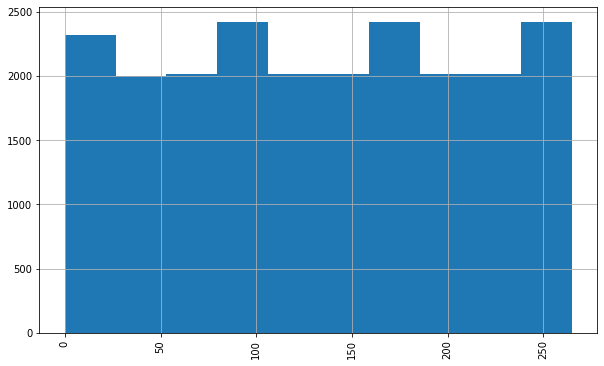

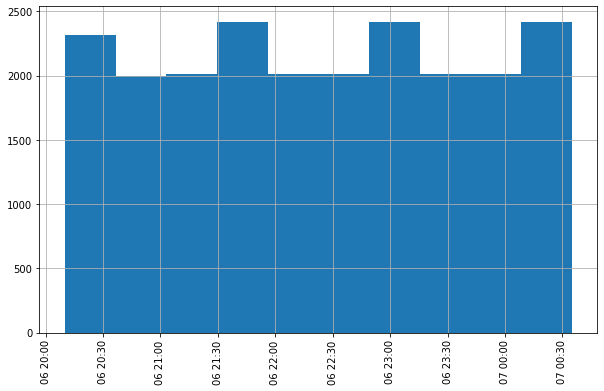

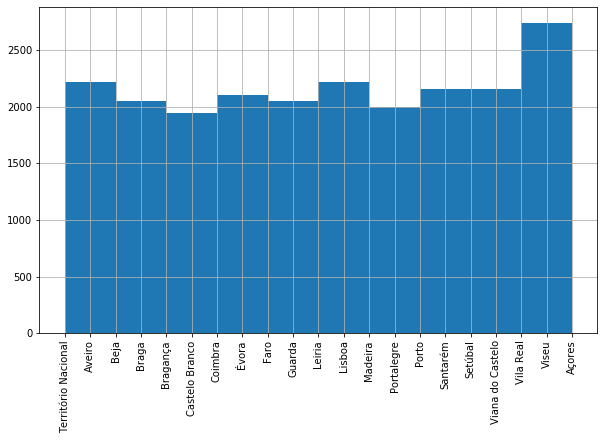

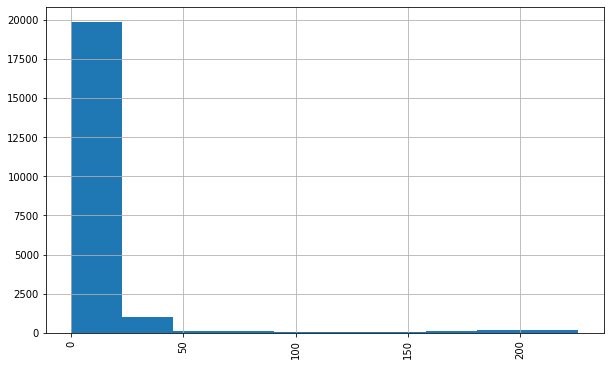

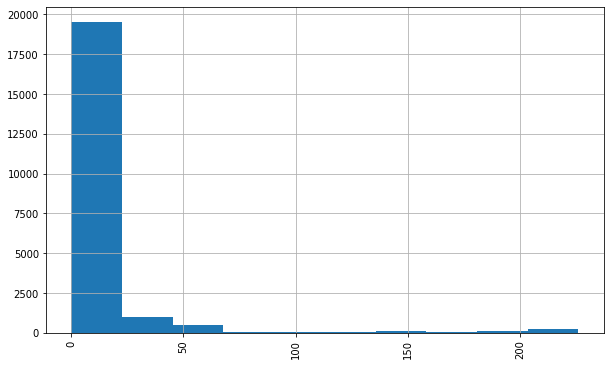

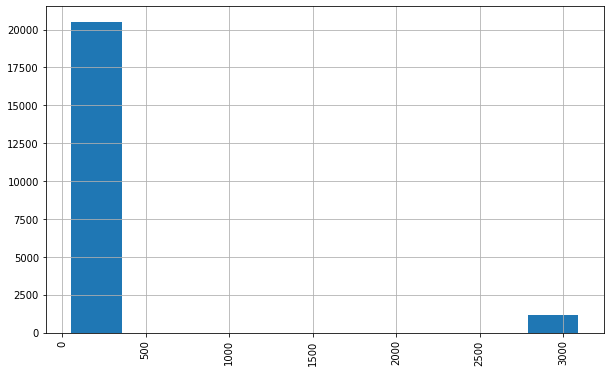

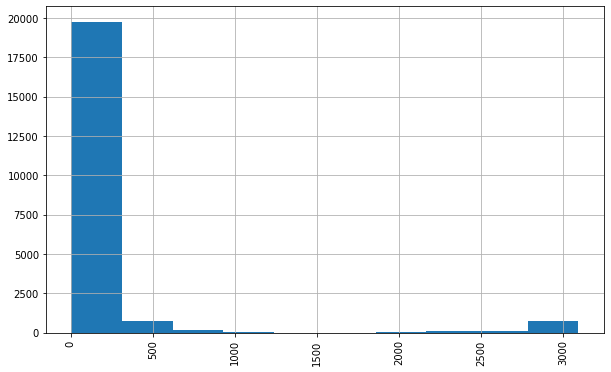

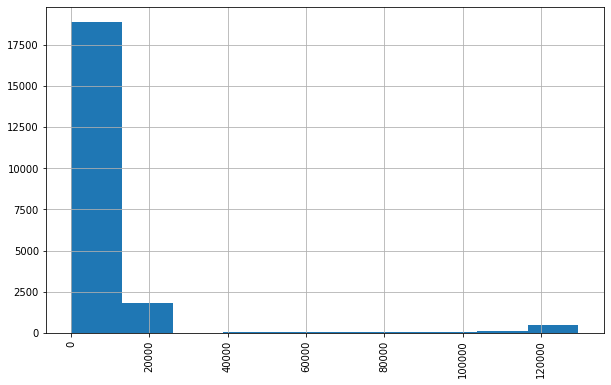

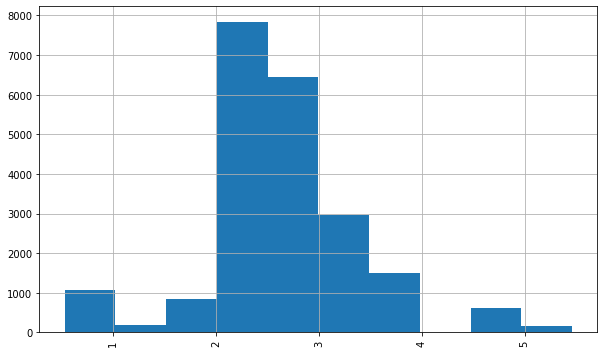

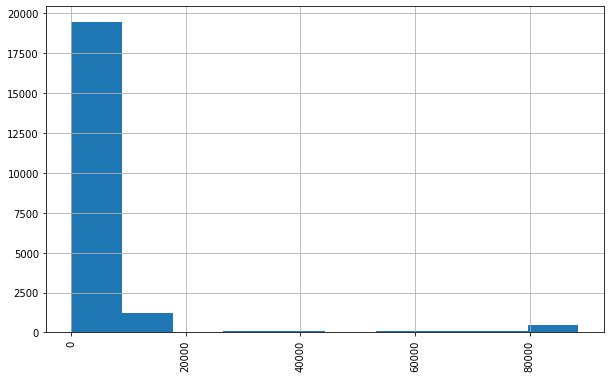

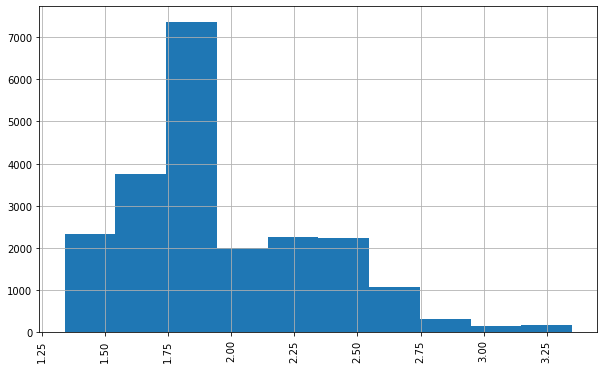

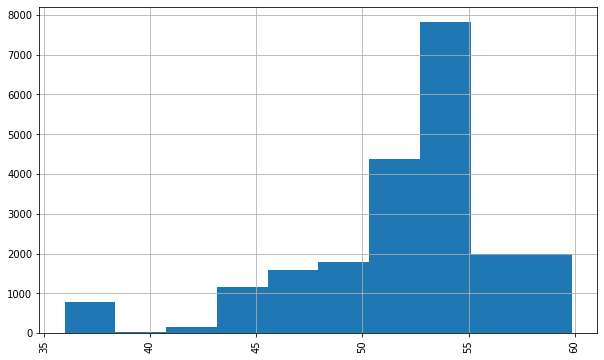

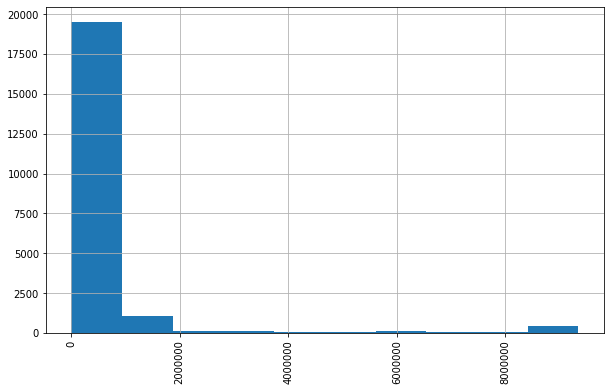

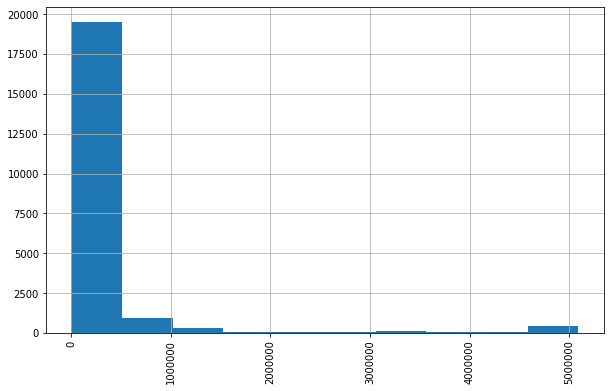

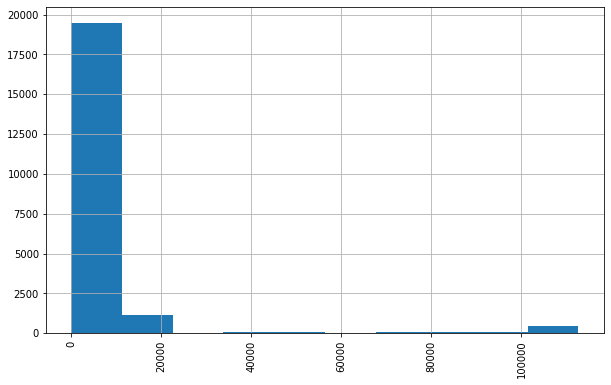

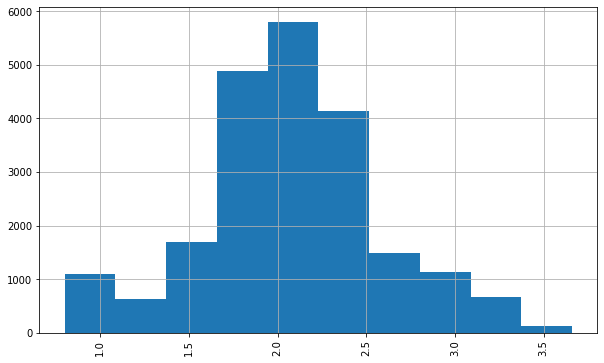

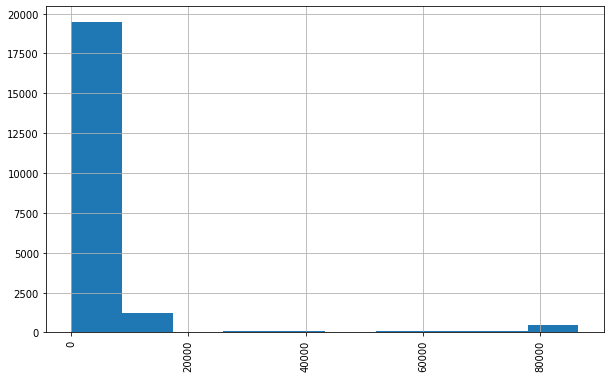

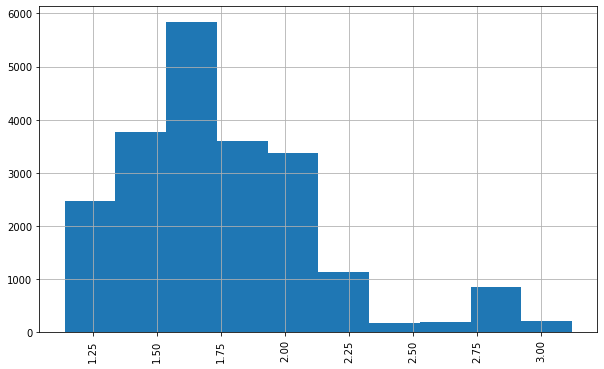

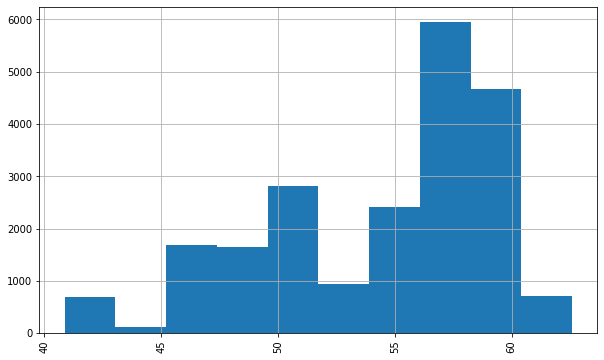

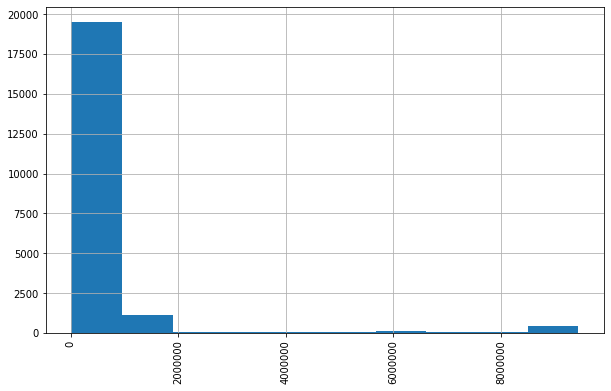

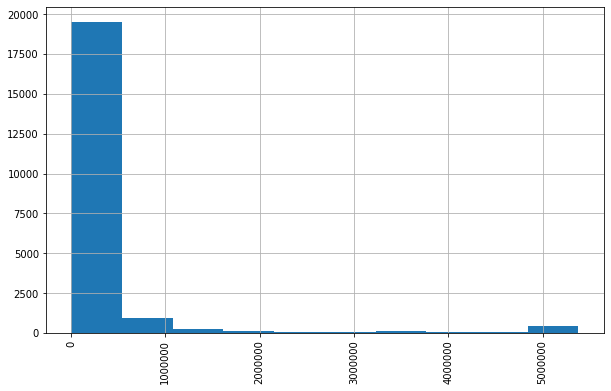

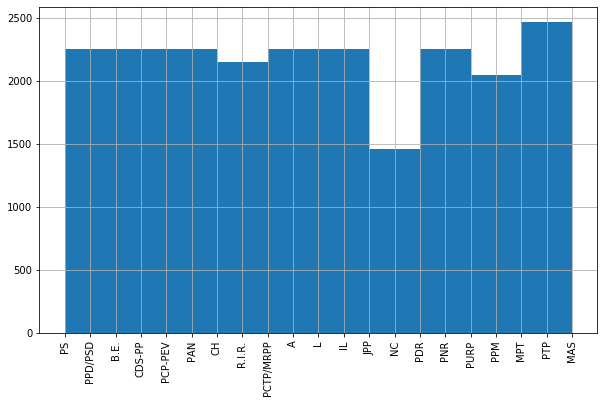

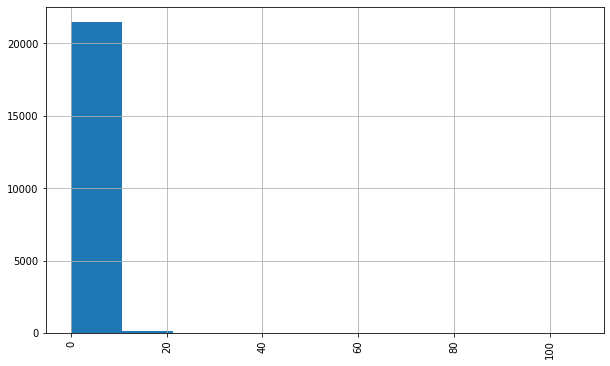

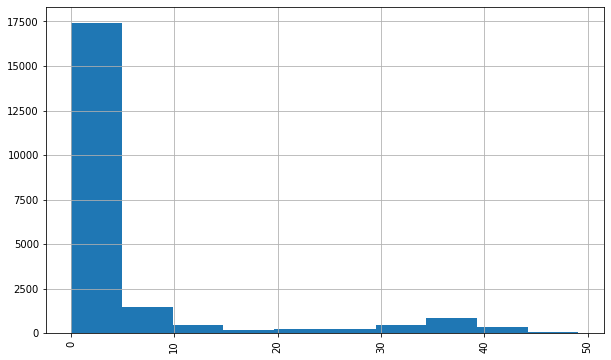

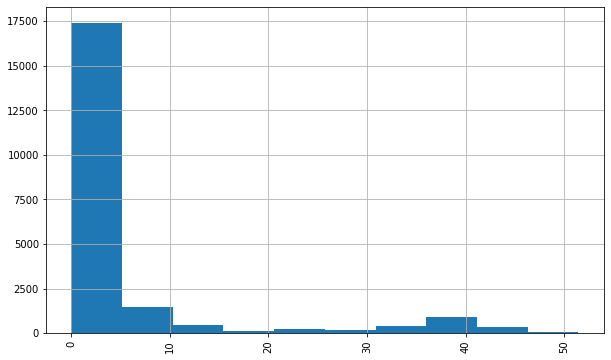

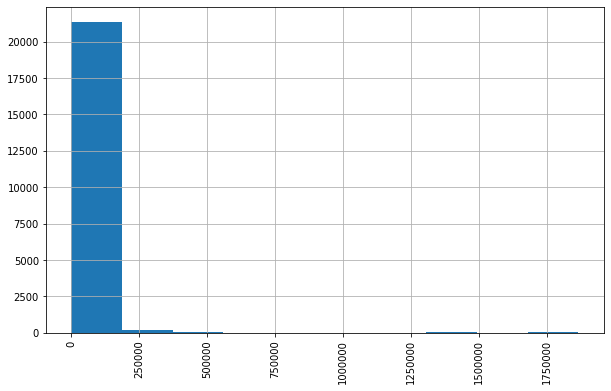

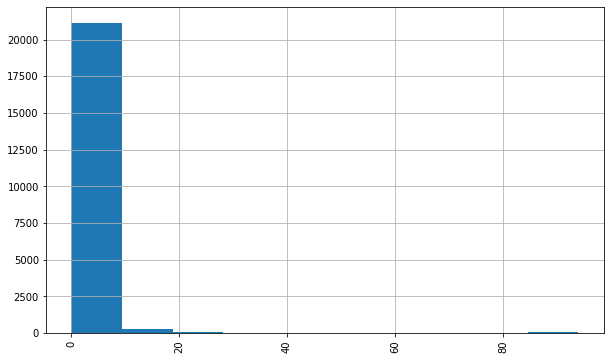

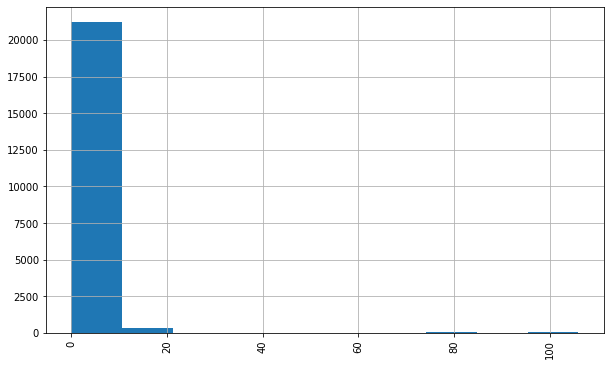

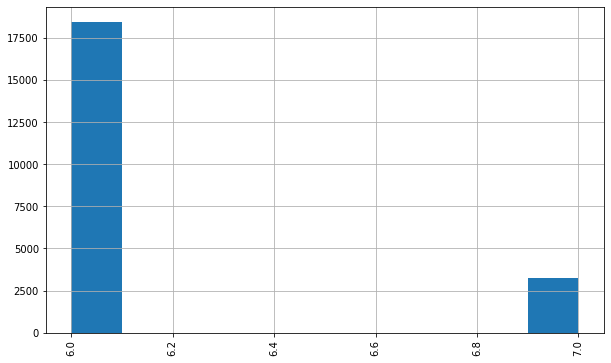

In [11]:
#plotting the hist for all columns
for col in df_train.columns: 
    plt.figure(figsize=(10,6))
    df_train[col].hist()
    plt.xticks(rotation=90)
    plt.show()

Território Nacional    1134
Porto                  1134
Braga                  1134
Leiria                 1134
Madeira                1080
Setúbal                1080
Viana do Castelo       1080
Viseu                  1080
Coimbra                1080
Lisboa                 1080
Aveiro                 1080
Guarda                 1026
Évora                  1026
Faro                   1026
Santarém               1026
Bragança                972
Castelo Branco          972
Portalegre              918
Beja                    918
Vila Real               864
Açores                  799
Name: territoryName, dtype: int64

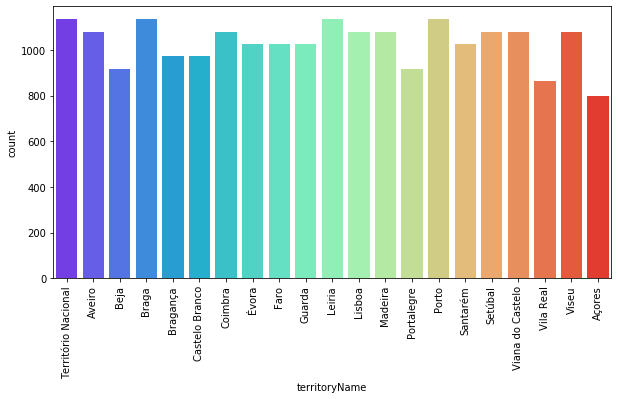

In [12]:
#plotting the count of territoryName column
plt.figure(figsize=(10,5))
sns.countplot(x='territoryName',data=df_train,palette='rainbow')
plt.xticks(rotation=90)
df_train['territoryName'].value_counts()

PS           1127
PCP-PEV      1127
PPD/PSD      1127
A            1127
CH           1127
PNR          1127
PAN          1127
IL           1127
L            1127
CDS-PP       1127
PCTP/MRPP    1127
B.E.         1127
PDR          1127
PPM          1073
R.I.R.       1026
MPT          1019
PTP          1019
NC            972
PURP          972
JPP           486
MAS           425
Name: Party, dtype: int64

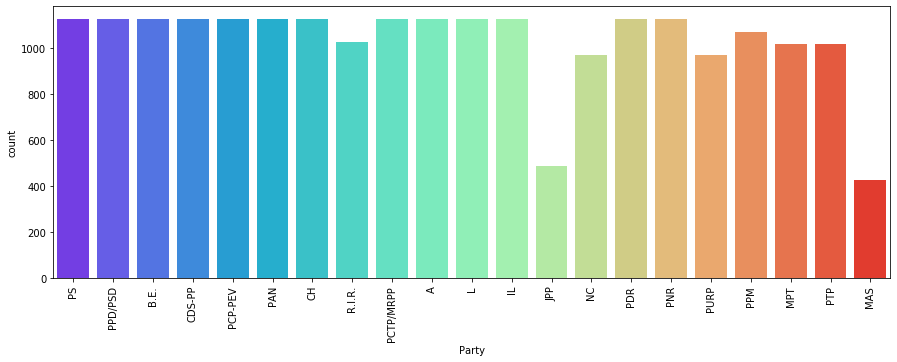

In [13]:
#plotting the count of Party column
plt.figure(figsize=(15,5))
sns.countplot(x='Party',data=df_train,palette='rainbow')
plt.xticks(rotation=90)
df_train['Party'].value_counts()

69      1944
110     1134
243     1134
3092    1134
347     1134
155     1080
55      1080
134     1080
54      1080
277     1080
147     1080
208     1080
141     1026
67      1026
242     1026
120      972
226      972
75       918
197      864
156      799
Name: numParishes, dtype: int64

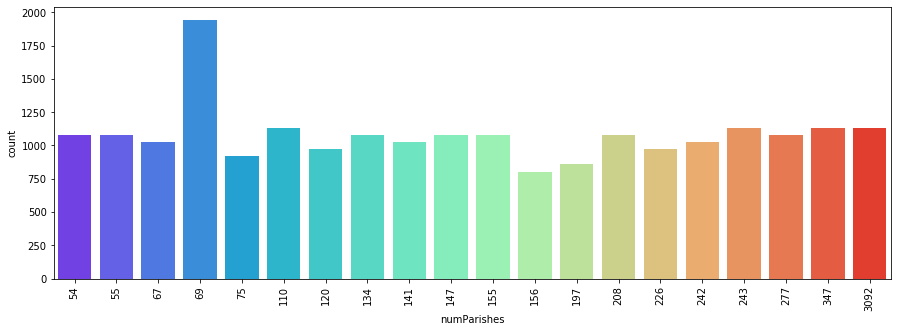

In [14]:
#plotting the count of numParishes column
plt.figure(figsize=(15,5))
sns.countplot(x='numParishes',data=df_train,palette='rainbow')
plt.xticks(rotation=90)
df_train['numParishes'].value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

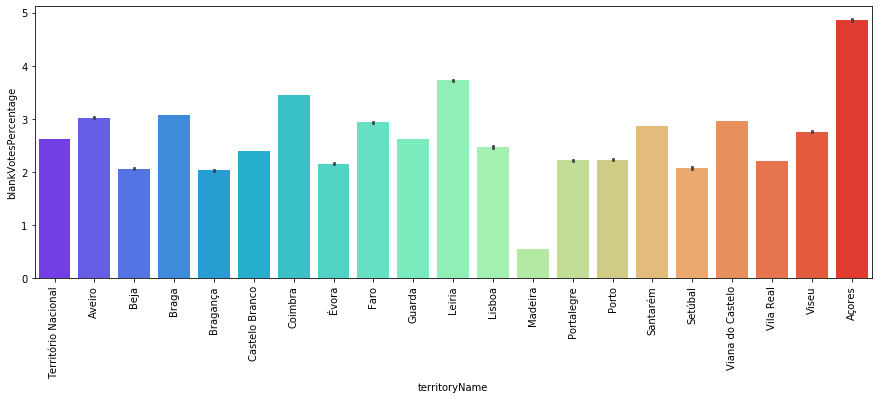

In [15]:
#plotting the graph with blank vote percenatge with territoryName and checking which territory has most blank votes
plt.figure(figsize=(15,5))
sns.barplot(x='territoryName',y='blankVotesPercentage',data=df_train,palette='rainbow')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

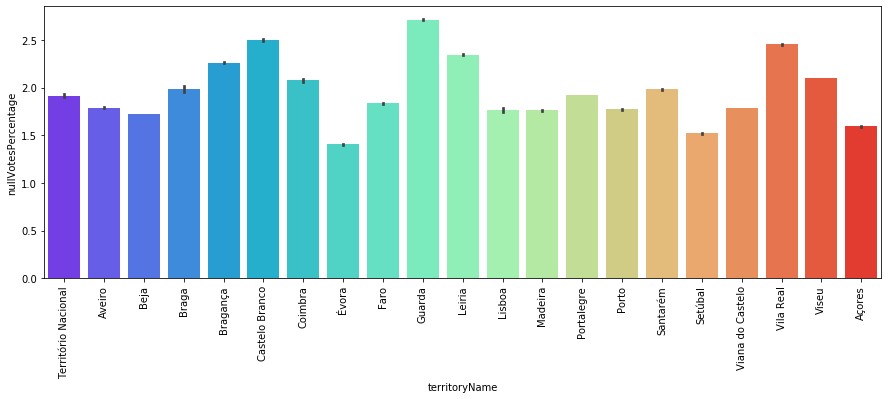

In [16]:
#plotting the graph with null vote percenatge with territoryName and checking which territory has most null votes
plt.figure(figsize=(15,5))
sns.barplot(x='territoryName',y='nullVotesPercentage',data=df_train,palette='rainbow')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

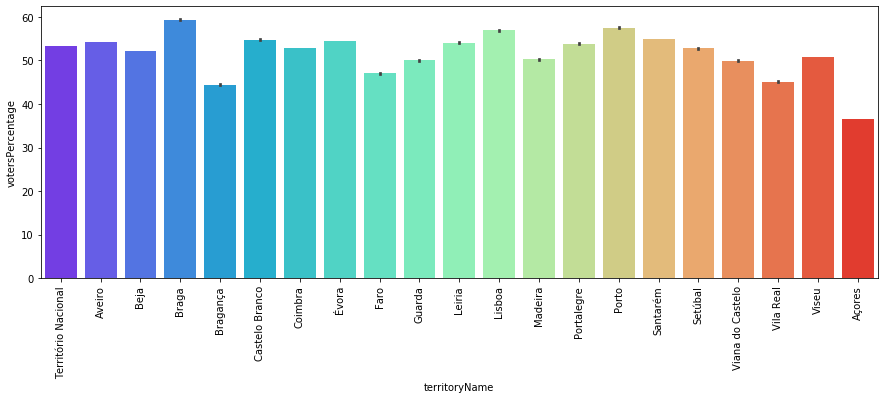

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x='territoryName',y='votersPercentage',data=df_train,palette='rainbow')
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

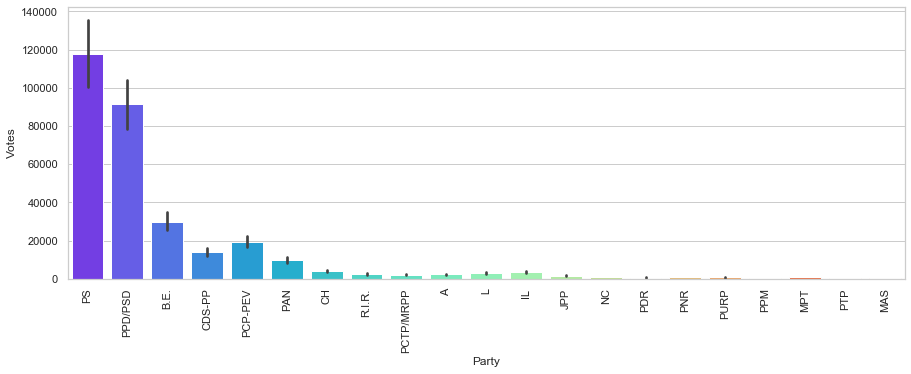

In [18]:
#plot party with the votes they have 
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
sns.barplot(x='Party',y='Votes',data=df_train,palette='rainbow')
plt.xticks(rotation=90)


## Analiysing data of current year and previous year 

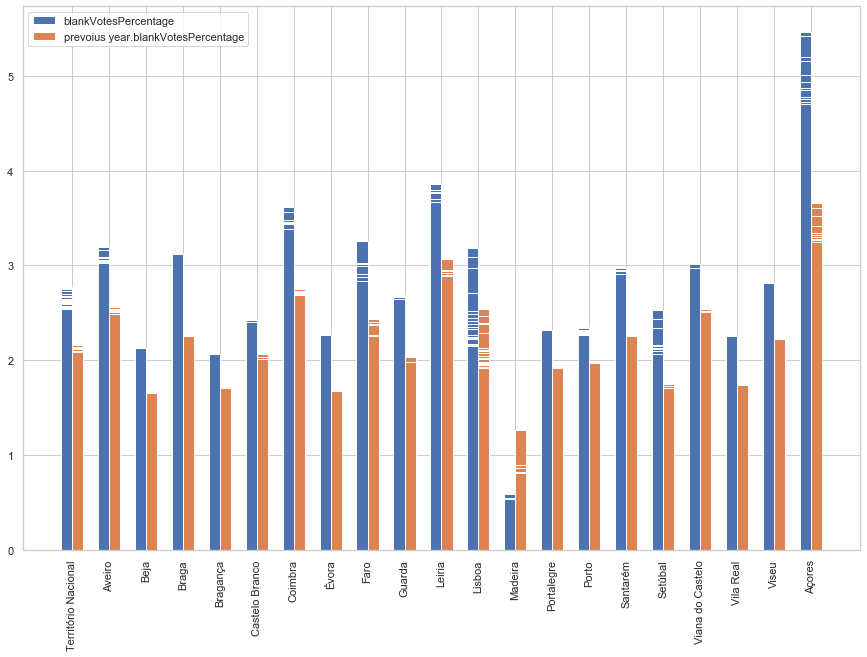

In [19]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(df_train['territoryName'], df_train['blankVotesPercentage'], align='edge', width=-0.3, label='blankVotesPercentage')
plt.bar(df_train['territoryName'], df_train['pre.blankVotesPercentage'], align='edge', width=0.3, label='prevoius year.blankVotesPercentage')
plt.legend()


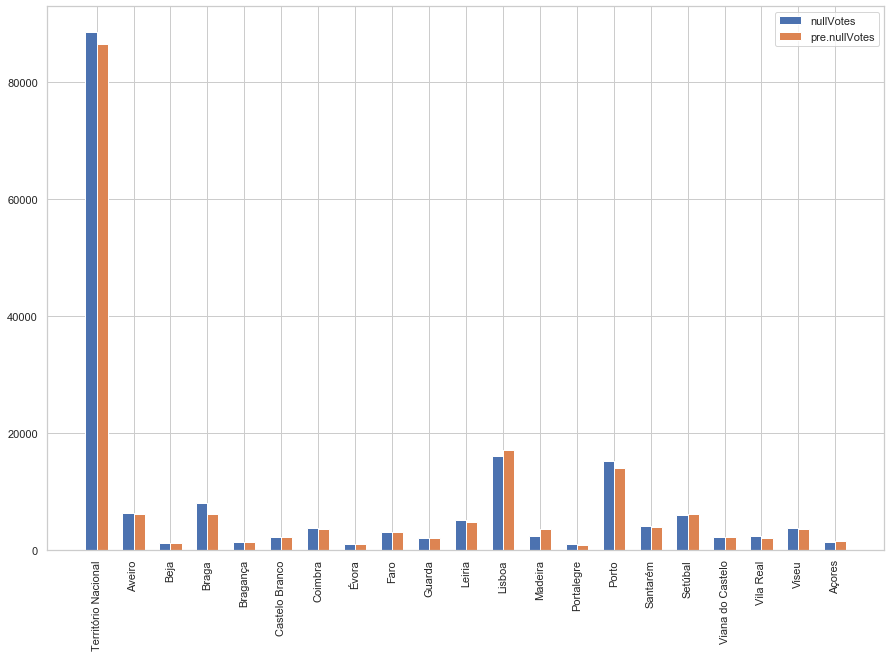

In [20]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(df_train['territoryName'], df_train['nullVotes'], align='edge', width=-0.3, label='nullVotes')
plt.bar(df_train['territoryName'], df_train['pre.nullVotes'], align='edge', width=0.3, label='pre.nullVotes')
plt.legend()


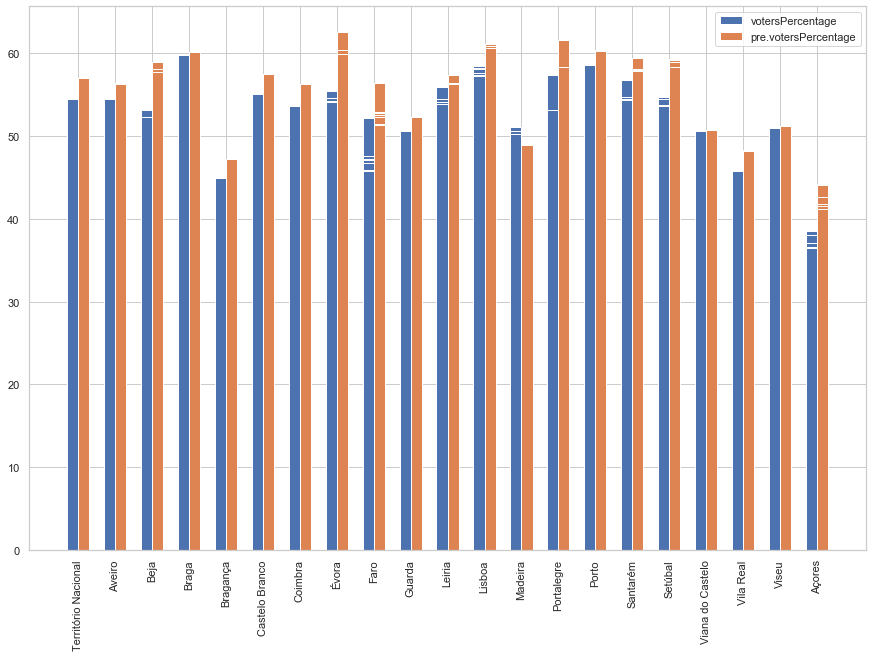

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.bar(df_train['territoryName'], df_train['votersPercentage'], align='edge', width=-0.3, label='votersPercentage')
plt.bar(df_train['territoryName'], df_train['pre.votersPercentage'], align='edge', width=0.3, label='pre.votersPercentage')
plt.legend()

# Summary Statistics

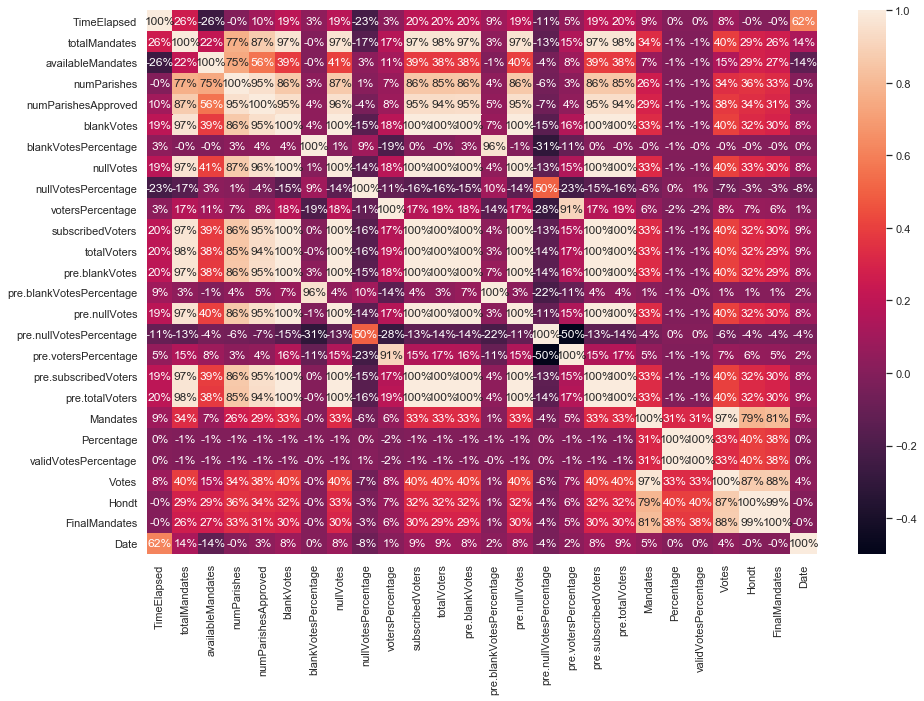

In [22]:
#correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True,fmt='0.0%')

__Observations:__
- final mandates show high correlation with votes ,hondt,mandates
- mandates also have high correlation with  votes
- most of the data is showing good relation

## correlation with target

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

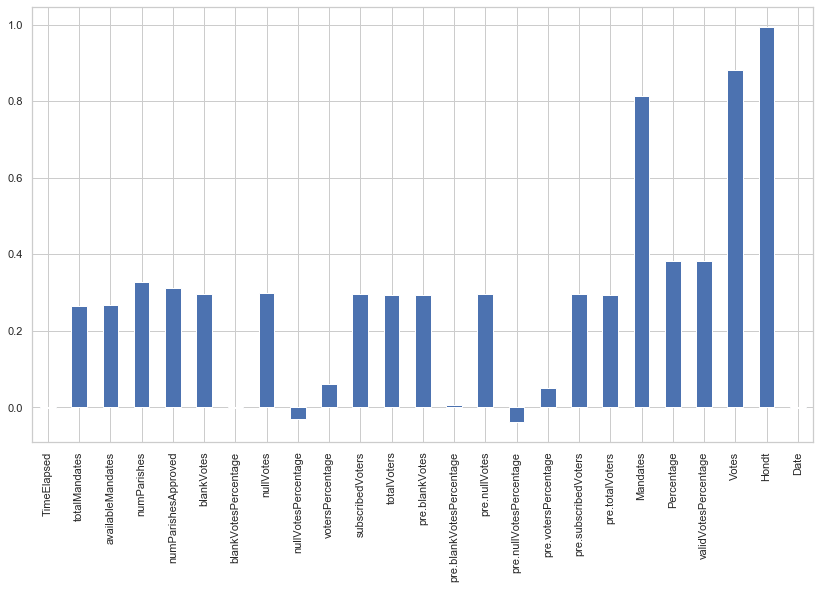

In [23]:
#corelation with target
plt.figure(figsize=(14,8))
df_train.drop('FinalMandates',axis=1).corrwith(df_train['FinalMandates']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)

__observations:__
   - Hondt and votes shows high correlation with target variable

In [24]:
#dropping the columns which is not of use
df_train.drop(["time","pre.subscribedVoters","pre.totalVoters","pre.blankVotes","pre.blankVotesPercentage","pre.nullVotesPercentage","pre.votersPercentage"],axis=1,inplace=True)

In [25]:
#checking data after dropping some columns
df_train.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,totalVoters,pre.nullVotes,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates,Date
0,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,...,386497,8171,PS,0,38.29,40.22,147993,94,106,6
1,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,...,386497,8171,PPD/PSD,0,33.28,34.95,128624,81,77,6
2,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,...,386497,8171,B.E.,0,6.81,7.15,26307,16,19,6
3,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,...,386497,8171,CDS-PP,0,4.90,5.14,18923,12,5,6
4,0,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,...,386497,8171,PCP-PEV,0,4.59,4.83,17757,11,12,6


In [26]:
#importing label encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
l=["territoryName","Party"]
for val in l:
    df_train[val]=le.fit_transform(df_train[val].astype(str))

# Removing Outliners 

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
z

array([[ 1.71470808,  0.98296816,  0.36868023, ..., 14.75732693,
        15.25996213,  0.41837381],
       [ 1.71470808,  0.98296816,  0.36868023, ..., 12.69167309,
        11.04023671,  0.41837381],
       [ 1.71470808,  0.98296816,  0.36868023, ...,  2.36340389,
         2.60078588,  0.41837381],
       ...,
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.17893929,
         0.1638618 ,  2.39020696],
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.17893929,
         0.1638618 ,  2.39020696],
       [ 1.69806785,  1.48421407,  0.11320217, ...,  0.17893929,
         0.1638618 ,  2.39020696]])

In [28]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     0, ..., 21608, 21623, 21623], dtype=int64), array([ 3,  4, 16, ..., 17, 16, 17], dtype=int64))


In [29]:
df_new=df_train[(z<3).all(axis=1)]

In [30]:
df_train.shape

(21643, 22)

In [31]:
df_new.shape

(18515, 22)

# Feature selection

In [32]:
df_new.shape

(18515, 22)

In [33]:
df_new.columns

Index(['TimeElapsed', 'territoryName', 'totalMandates', 'availableMandates',
       'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.nullVotes',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates', 'Date'],
      dtype='object')

In [34]:
#spillting data into input and output variable
x=df_new.drop('FinalMandates',axis=1)
x.head()

,TimeElapsed,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,...,subscribedVoters,totalVoters,pre.nullVotes,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,Date
22,0,0,0,16,147,12,186,2.92,101,1.59,...,11953,6371,111,17,0,34.33,35.95,2187,7,6
23,0,0,0,16,147,12,186,2.92,101,1.59,...,11953,6371,111,1,0,7.47,7.82,476,1,6
24,0,0,0,16,147,12,186,2.92,101,1.59,...,11953,6371,111,2,0,6.14,6.43,391,1,6
25,0,0,0,16,147,12,186,2.92,101,1.59,...,11953,6371,111,11,0,2.39,2.50,152,0,6
26,0,0,0,16,147,12,186,2.92,101,1.59,...,11953,6371,111,10,0,2.04,2.14,130,0,6


In [35]:
y=df_new["FinalMandates"]
y.head()

22    7
23    2
24    1
25    0
26    0
Name: FinalMandates, dtype: int64

In [36]:
#checking the shape of input and output varaible
print(x.shape)
print(y.shape)

(18515, 21)
(18515,)


In [37]:
#scaling the input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [38]:
#spiltting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [39]:
#checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12960, 21)
(5555, 21)
(12960,)
(5555,)


In [40]:
#importing all the model libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [41]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:    
    m.fit(x_train,y_train)
    print("score of ",m,"is :",m.score(x_train,y_train))
    pred=m.predict(x_test)
    print("\n")
    print("r2 score is:",r2_score(y_test,pred))
    print("mean absolute error is:",mean_absolute_error(y_test,pred))
    print("mean squared error is:",mean_squared_error(y_test,pred))
    print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,pred)))
    print("\n")
    print("                                                                  ")
    print("\n")

score of  LinearRegression() is : 0.9855382463993794


r2 score is: 0.9863815100078527
mean absolute error is: 0.04610069524689429
mean squared error is: 0.024511362653277483
Root mean squared error is: 0.15656105088200412


                                                                  


score of  DecisionTreeRegressor() is : 1.0


r2 score is: 0.9990998395105403
mean absolute error is: 0.0009000900090009
mean squared error is: 0.0016201620162016202
Root mean squared error is: 0.040251236207123134


                                                                  


score of  KNeighborsRegressor() is : 0.9988928938534668


r2 score is: 0.997079479300864
mean absolute error is: 0.009216921692169215
mean squared error is: 0.005256525652565257
Root mean squared error is: 0.07250190102725071


                                                                  


score of  SVR() is : 0.9778649467827378


r2 score is: 0.970733985596522
mean absolute error is: 0.06246051783993591
mean sq

In [42]:
#using the cross validation
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet(),AdaBoostRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print("score of ",m,"is:",score)
    print("mean score",score.mean())
    print("standard deviation",score.std())
    print('\n')
    print("           ")

score of  LinearRegression() is: [0.96096446 0.98427713 0.99562943 0.99939734 0.98531243]
mean score 0.9851161576003475
standard deviation 0.013405433797960668


           
score of  DecisionTreeRegressor() is: [0.91682581 0.99139345 0.99796963 1.         1.        ]
mean score 0.9812377783792767
standard deviation 0.032360582558876826


           
score of  KNeighborsRegressor() is: [0.92353559 0.98446518 0.98754709 0.99006426 0.9994962 ]
mean score 0.9770216629252048
standard deviation 0.0272108962686762


           
score of  SVR() is: [ 0.74908447  0.96648468  0.9572865   0.9299801  -0.55452599]
mean score 0.6096619524604192
standard deviation 0.5874591377936964


           
score of  Lasso() is: [0.02295104 0.49362388 0.48792222 0.48776322 0.55393431]
mean score 0.4092389329224349
standard deviation 0.1947475434861742


           
score of  Ridge() is: [0.96098233 0.98427875 0.99561724 0.99941497 0.99907732]
mean score 0.9878741204523761
standard deviation 0.01452414495354649

### All the model are showing good score so we can choose any of them.So i am taking  RandomForestRegressor as a model

## Using GridSearchCV for best parameters

In [43]:
param_grid = {'max_depth': [80, 90, 100, 110],'n_estimators': [10,50,100,200]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'max_depth': 80, 'n_estimators': 200}

In [ ]:
rf = RandomForestRegressor(max_depth=80,n_estimators=200)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)
rf.fit(x_train,y_train)
print("score of ",rf,"is :",rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,predrf))
print("mean squared error is:",mean_squared_error(y_test,predrf))
print("Root mean squared error is:",np.sqrt(mean_squared_error(y_test,predrf)))
print("\n")

# Saving the best model

In [ ]:
import joblib
joblib.dump(rf,'rf.election.pkl')

## Conclusions:
- while doing summary statistics we see that previous null votes percenatge was 3.12 and current is 3.35 so this tells null votes gets increased this year
- During EDA analysis we got to know that acores ahs maximum blank votes and this year its also increases and Território Nacional has maximum null votes
- Then we change categorical data to numeric
- Then checking summary statistics and also checking correlation
- Then using zscore to remove outliners
- Then using train test split we apply all model and check score and also we use cross validation score to get best score
- Random forest shows the best result and using gridsearch CV finding best parameter and then apply to the model.
